<a href="https://colab.research.google.com/github/Rohitkumar-88/ML_Projects/blob/Colab_Notebooks/MNIST_Digits_prediction_with_feed_forward_NN_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Digits prediction with feed forward Neural Networks and CNNs

import libraries and data

In [3]:
from keras.datasets import mnist
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from matplotlib import pyplot
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

Let's visualize what the data looks like

11490434/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), Y=(60000,)
Test: X=(10000, 28, 28), Y=(10000,)


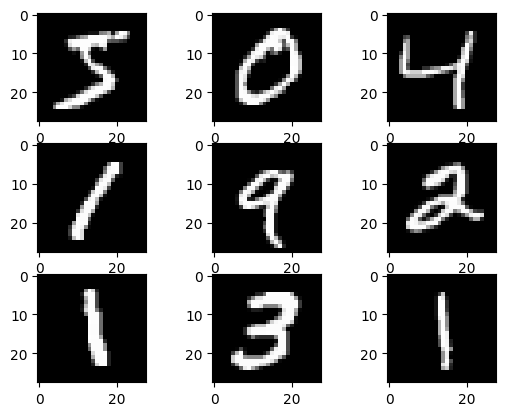

In [4]:
(trainX, trainy), (testX , testy) = mnist.load_data()
print('Train: X=%s, Y=%s' %(trainX.shape, trainy.shape))
print('Test: X=%s, Y=%s' %(testX.shape, testy.shape))

# plot first few images
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # plot raw pixel data
  pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))

# Show the figure
pyplot.show()

Let's ensure that the data is evenly distributed per class (if not, we would have to make corrections). We should expect that each class represents roughly 10% of the entire dataset.

In [5]:
for i in range(10):
  count_train = np.where(trainy == i)[0]
  count_test = np.where(testy == i)[0]

  print("Label %d - train: %.4f - test: %.4f" %(i, count_train.shape[0] / float(trainy.shape[0]), count_test.shape[0] / float(testy.shape[0]) ))

Label 0 - train: 0.0987 - test: 0.0980
Label 1 - train: 0.1124 - test: 0.1135
Label 2 - train: 0.0993 - test: 0.1032
Label 3 - train: 0.1022 - test: 0.1010
Label 4 - train: 0.0974 - test: 0.0982
Label 5 - train: 0.0903 - test: 0.0892
Label 6 - train: 0.0986 - test: 0.0958
Label 7 - train: 0.1044 - test: 0.1028
Label 8 - train: 0.0975 - test: 0.0974
Label 9 - train: 0.0992 - test: 0.1009


In [6]:
trainX[0]/255

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Now let's try building a 2-layer feed forward network to predict digits. Remember, each data point is a 28x28 image, so you will need to flatten it into a vector for a feed forward DNN.

In [7]:
#Define DNN class here

#Example Solution


class FeedForwardNet(nn.Module):

    def __init__(self, dim_input, dim_out):
        super(FeedForwardNet, self).__init__()
        self.fc1 = nn.Linear(dim_input, 32)
        self.fc2 = nn.Linear(32, dim_out)

    def forward(self, x):
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

    def train(self, X, y, epochs, batch_size):
        optimizer = optim.SGD(net.parameters(), lr=0.001)
        indices = np.arange(X.shape[0])

        criterion = nn.CrossEntropyLoss()
        for i in range(epochs):
            optimizer.zero_grad()

            idx = indices[:batch_size]
            batch_data = X[idx].reshape((batch_size, -1))
            batch_label = y[idx]

            logits = self.forward(batch_data)

            loss = criterion(logits, batch_label)
            loss.backward()
            optimizer.step()
            if i % 100 == 0:
              print("Iteration %d - loss: %.4f" %(i, loss))



    def test(self, test_data, test_labels, batch_size):
        k = 0
        all_probs = None
        while k < test_data.shape[0]:
            batch = test_data[k:k+batch_size,:,:] if k + batch_size <= test_data.shape[0] else test_data[k:,:,:]
            batch = batch.reshape((-1,test_data.shape[1]*test_data.shape[2]))
            logits = self.forward(batch)

            probs = F.softmax(logits).detach().numpy()

            all_probs = probs if all_probs is None else np.vstack((all_probs, probs))
            k += batch_size

        return all_probs




Ok, it looks good....we can work with these classes as is. Now let's start doing some prediction. We should split the training data into train and dev sets.

In [8]:
#Train DNN and predict on test

#Example
net = FeedForwardNet(dim_input=(trainX.shape[1]*trainX.shape[2]), dim_out=10)

torch_trainX = torch.from_numpy(trainX).float()
torch_trainy = torch.from_numpy(trainy).long()
torch_testX = torch.from_numpy(testX).float()
torch_testy = torch.from_numpy(testy).long()

net.train(torch_trainX, torch_trainy, epochs=4000, batch_size=64)

Iteration 0 - loss: 2.4157
Iteration 100 - loss: 2.0011
Iteration 200 - loss: 1.9246
Iteration 300 - loss: 1.8593
Iteration 400 - loss: 1.7983
Iteration 500 - loss: 1.7405
Iteration 600 - loss: 1.6862
Iteration 700 - loss: 1.6365
Iteration 800 - loss: 1.5905
Iteration 900 - loss: 1.5439
Iteration 1000 - loss: 1.5040
Iteration 1100 - loss: 1.4581
Iteration 1200 - loss: 1.4199
Iteration 1300 - loss: 1.3850
Iteration 1400 - loss: 1.3458
Iteration 1500 - loss: 1.3106
Iteration 1600 - loss: 1.2798
Iteration 1700 - loss: 1.2485
Iteration 1800 - loss: 1.2201
Iteration 1900 - loss: 1.1915
Iteration 2000 - loss: 1.1650
Iteration 2100 - loss: 1.1387
Iteration 2200 - loss: 1.1143
Iteration 2300 - loss: 1.0907
Iteration 2400 - loss: 1.0681
Iteration 2500 - loss: 1.0463
Iteration 2600 - loss: 1.0252
Iteration 2700 - loss: 1.0033
Iteration 2800 - loss: 0.9838
Iteration 2900 - loss: 0.9614
Iteration 3000 - loss: 0.9429
Iteration 3100 - loss: 0.9243
Iteration 3200 - loss: 0.9067
Iteration 3300 - loss:

In [9]:
pred_probs = net.test(torch_testX, torch_testy, batch_size=64)
preds = np.argmax(pred_probs, axis=1)
p, r, f, _ = precision_recall_fscore_support(testy, preds)

<ipython-input-7-5ceabaca763c>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = F.softmax(logits).detach().numpy()


Report:
- precision
- recall
- ROC curve
- confusion matrix

In [10]:
#Enter code here
for i in range(p.shape[0]):
  print("Label: %d - Precision: %.4f - Recall: %.4f - f1: %.4f"  %(i, p[i], r[i], f[i]))

Label: 0 - Precision: 0.5406 - Recall: 0.5296 - f1: 0.5351
Label: 1 - Precision: 0.5105 - Recall: 0.6414 - f1: 0.5685
Label: 2 - Precision: 0.3516 - Recall: 0.0620 - f1: 0.1054
Label: 3 - Precision: 0.4006 - Recall: 0.5604 - f1: 0.4672
Label: 4 - Precision: 0.2640 - Recall: 0.4165 - f1: 0.3232
Label: 5 - Precision: 0.7011 - Recall: 0.0684 - f1: 0.1246
Label: 6 - Precision: 0.4815 - Recall: 0.5856 - f1: 0.5285
Label: 7 - Precision: 0.5844 - Recall: 0.2695 - f1: 0.3688
Label: 8 - Precision: 0.1413 - Recall: 0.0678 - f1: 0.0916
Label: 9 - Precision: 0.2227 - Recall: 0.5025 - f1: 0.3086


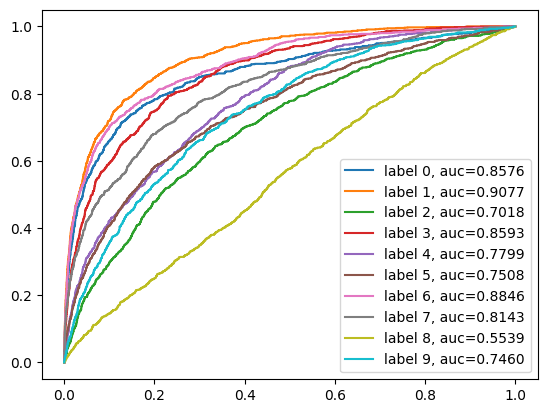

In [11]:
y = label_binarize(testy, classes=np.unique(testy))
plt.clf()
for i in range(10):
  fpr, tpr, _ = metrics.roc_curve(y[:,i],  pred_probs[:,i])
  auc = metrics.roc_auc_score(y[:,i], pred_probs[:,i])
  plt.plot(fpr,tpr,label="label %d, auc=%.4f" %(i, auc))
plt.legend(loc=4)
plt.show()

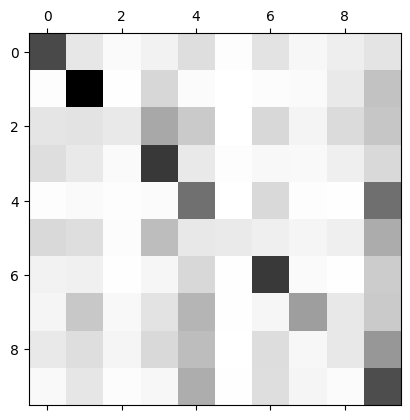

In [12]:
cm=metrics.confusion_matrix(testy,preds)
plt.matshow(cm, cmap='binary')

Now let's build a CNN network for image recognition.

In [13]:
# Define CNN

#Example solution
class CNN_network(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(256, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def train(self, X, y, epochs, batch_size):
        optimizer = optim.SGD(net.parameters(), lr=0.001)
        indices = np.arange(X.shape[0])

        criterion = nn.CrossEntropyLoss()
        for i in range(epochs):
            optimizer.zero_grad()

            idx = indices[:batch_size]
            batch_data = X[idx]
            batch_label = y[idx]

            logits = self.forward(batch_data)

            loss = criterion(logits, batch_label)
            loss.backward()
            optimizer.step()
            if i % 100 == 0:
              print("Iteration %d - loss: %.4f" %(i, loss))

    def test(self, test_data, test_labels, batch_size):
        k = 0
        all_probs = None
        while k < test_data.shape[0]:
            batch = test_data[k:k+batch_size,:,:] if k + batch_size <= test_data.shape[0] else test_data[k:,:,:]
            logits = self.forward(batch)

            probs = F.softmax(logits).detach().numpy()

            all_probs = probs if all_probs is None else np.vstack((all_probs, probs))
            k += batch_size

        return all_probs




In [14]:
# Train CNN and predict on test
net = CNN_network()

torch_trainX = torch.from_numpy(trainX).float()
torch_trainy = torch.from_numpy(trainy).long()
torch_testX = torch.from_numpy(testX).float()
torch_testy = torch.from_numpy(testy).long()

torch_trainX = torch.unsqueeze(torch_trainX, 1)
torch_testX = torch.unsqueeze(torch_testX, 1)

net.train(torch_trainX, torch_trainy, epochs=1000, batch_size=128)

Iteration 0 - loss: 4.5201
Iteration 100 - loss: 0.1457
Iteration 200 - loss: 0.0461
Iteration 300 - loss: 0.0240
Iteration 400 - loss: 0.0154
Iteration 500 - loss: 0.0110
Iteration 600 - loss: 0.0083
Iteration 700 - loss: 0.0067
Iteration 800 - loss: 0.0055
Iteration 900 - loss: 0.0047


In [15]:
pred_probs = net.test(torch_testX, torch_testy, batch_size=64)
preds = np.argmax(pred_probs, axis=1)
p, r, f, _ = precision_recall_fscore_support(testy, preds)

<ipython-input-13-e27e044c0cde>:51: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = F.softmax(logits).detach().numpy()


Report:
- precision
- recall
- ROC curve
- confusion matrix

In [16]:
#Enter code here
for i in range(p.shape[0]):
  print("Label: %d - Precision: %.4f - Recall: %.4f - f1: %.4f"  %(i, p[i], r[i], f[i]))

Label: 0 - Precision: 0.8118 - Recall: 0.8143 - f1: 0.8130
Label: 1 - Precision: 0.8355 - Recall: 0.9753 - f1: 0.9000
Label: 2 - Precision: 0.6068 - Recall: 0.7762 - f1: 0.6811
Label: 3 - Precision: 0.6971 - Recall: 0.7495 - f1: 0.7223
Label: 4 - Precision: 0.5460 - Recall: 0.6945 - f1: 0.6114
Label: 5 - Precision: 0.6865 - Recall: 0.2971 - f1: 0.4147
Label: 6 - Precision: 0.7844 - Recall: 0.7370 - f1: 0.7600
Label: 7 - Precision: 0.8833 - Recall: 0.6994 - f1: 0.7807
Label: 8 - Precision: 0.6694 - Recall: 0.4990 - f1: 0.5718
Label: 9 - Precision: 0.5334 - Recall: 0.6402 - f1: 0.5820


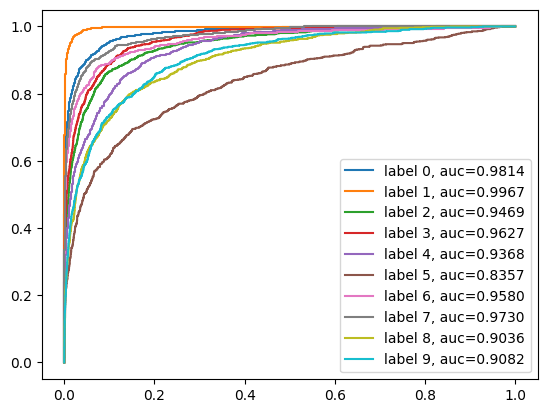

In [17]:
y = label_binarize(testy, classes=np.unique(testy))
plt.clf()
for i in range(10):
  fpr, tpr, _ = metrics.roc_curve(y[:,i],  pred_probs[:,i])
  auc = metrics.roc_auc_score(y[:,i], pred_probs[:,i])
  plt.plot(fpr,tpr,label="label %d, auc=%.4f" %(i, auc))
plt.legend(loc=4)
plt.show()

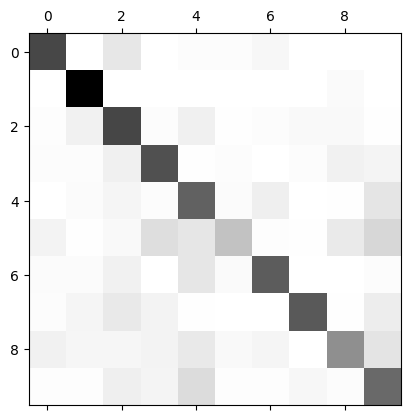

In [18]:
cm=metrics.confusion_matrix(testy,preds)
plt.matshow(cm, cmap='binary')

At this point, you should have seen an improvement in performance when using CNN for images over DNN. Look into the performance metrics (specially the confusion matrix), and try to identify where CNNs made a difference in performance.

Are there specific number pairs that were difficult for DNN but improved on CNN?

Finally, pick a pair of classes that have high confusion an plot examples that are confusing between them. Can you see why the confusion happens? (This type of post-hoc investigation is typical in the industry to understand why/when something might fail, and work towards fixing those edge cases).

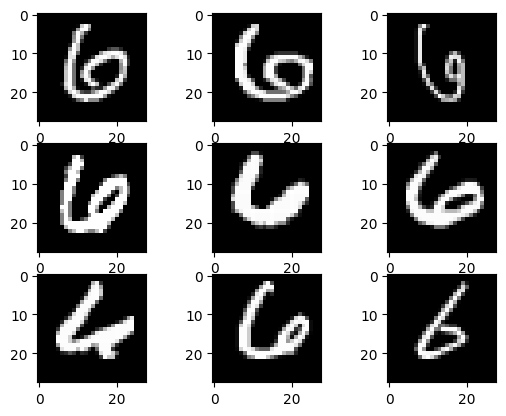

In [19]:
#Enter code here

#From the confusion matrix we can see what numbers tend to be confused with others.
#Find some pair of numbers that create confusion and visualize why they might be having issues.

examples = []
for i in range(preds.shape[0]):
  if (preds[i] == 4 and testy[i] == 6):
    examples.append( testX[i] )

    if len(examples) == 9:
      break

for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(examples[i], cmap=pyplot.get_cmap('gray'))

# show the figure
pyplot.show()